<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher-Examples/blob/main/WW_PEFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install weightwatcher
import weightwatcher as ww
ww.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 1.2 MB/s eta 0:00:00


'0.7.4.7'

### 1) A simple example: llama-7b-lora



In [2]:
!git clone https://huggingface.co/DevaMalla/llama_7b_lora

Cloning into 'llama_7b_lora'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 10), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (31/31), 4.06 KiB | 462.00 KiB/s, done.


### 2) Describe the model

### 2a) peft=False



In [4]:
watcher = ww.WeightWatcher()
details = watcher.describe(model='llama_7b_lora')

In [5]:
details

,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,0,base_model.model.model.layers.0.self_attn.q_pr...,64,4096,64.0,dense,base_model.model.model.layers.0.self_attn.q_pr...,64,1
1,1,base_model.model.model.layers.0.self_attn.q_pr...,64,4096,64.0,dense,base_model.model.model.layers.0.self_attn.q_pr...,64,1
2,2,base_model.model.model.layers.0.self_attn.v_pr...,64,4096,64.0,dense,base_model.model.model.layers.0.self_attn.v_pr...,64,1
3,3,base_model.model.model.layers.0.self_attn.v_pr...,64,4096,64.0,dense,base_model.model.model.layers.0.self_attn.v_pr...,64,1
4,4,base_model.model.model.layers.1.self_attn.q_pr...,64,4096,64.0,dense,base_model.model.model.layers.1.self_attn.q_pr...,64,1
...,...,...,...,...,...,...,...,...,...
123,123,base_model.model.model.layers.30.self_attn.v_p...,64,4096,64.0,dense,base_model.model.model.layers.30.self_attn.v_p...,64,1
124,124,base_model.model.model.layers.31.self_attn.q_p...,64,4096,64.0,dense,base_model.model.model.layers.31.self_attn.q_p...,64,1
125,125,base_model.model.model.layers.31.self_attn.q_p...,64,4096,64.0,dense,base_model.model.model.layers.31.self_attn.q_p...,64,1
126,126,base_model.model.model.layers.31.self_attn.v_p...,64,4096,64.0,dense,base_model.model.model.layers.31.self_attn.v_p...,64,1


### 2b) peft=True





In [8]:
watcher = ww.WeightWatcher()
details = watcher.describe(model='llama_7b_lora', peft=True)

In [9]:
details

,layer_id,name,M,N,Q,layer_type,longname,num_evals,peft,rf
0,0,base_model.model.model.layers.0.self_attn.q_pr...,4096,4096,1.0,dense,base_model.model.model.layers.0.self_attn.q_pr...,4096,True,1
1,2,base_model.model.model.layers.0.self_attn.v_pr...,4096,4096,1.0,dense,base_model.model.model.layers.0.self_attn.v_pr...,4096,True,1
2,4,base_model.model.model.layers.1.self_attn.q_pr...,4096,4096,1.0,dense,base_model.model.model.layers.1.self_attn.q_pr...,4096,True,1
3,6,base_model.model.model.layers.1.self_attn.v_pr...,4096,4096,1.0,dense,base_model.model.model.layers.1.self_attn.v_pr...,4096,True,1
4,8,base_model.model.model.layers.2.self_attn.q_pr...,4096,4096,1.0,dense,base_model.model.model.layers.2.self_attn.q_pr...,4096,True,1
...,...,...,...,...,...,...,...,...,...,...
59,118,base_model.model.model.layers.29.self_attn.v_p...,4096,4096,1.0,dense,base_model.model.model.layers.29.self_attn.v_p...,4096,True,1
60,120,base_model.model.model.layers.30.self_attn.q_p...,4096,4096,1.0,dense,base_model.model.model.layers.30.self_attn.q_p...,4096,True,1
61,122,base_model.model.model.layers.30.self_attn.v_p...,4096,4096,1.0,dense,base_model.model.model.layers.30.self_attn.v_p...,4096,True,1
62,124,base_model.model.model.layers.31.self_attn.q_p...,4096,4096,1.0,dense,base_model.model.model.layers.31.self_attn.q_p...,4096,True,1


### 3) Analyze the adapted_model.bin




In [10]:
watcher = ww.WeightWatcher()
details = watcher.analyze(model='llama_7b_lora', peft=True)

In [11]:
details

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,0,base_model.model.model.layers.0.self_attn.q_pr...,0.042252,4096,4096,1.0,1.540013,-0.009507,0.256432,True,...,0.086471,0.985886,1.390489,success,0.992918,0.006886,over-trained,0,0.985886,0.000263
1,2,base_model.model.model.layers.0.self_attn.v_pr...,0.039096,4096,4096,1.0,1.517035,0.935484,0.063417,True,...,0.088671,4.136691,1.043071,success,2.033886,0.004409,over-trained,0,4.136691,0.000219
2,4,base_model.model.model.layers.1.self_attn.q_pr...,0.033704,4096,4096,1.0,1.614115,0.076160,0.285270,True,...,0.098337,1.114766,1.523906,success,1.055825,0.011276,over-trained,0,1.114766,0.000530
3,6,base_model.model.model.layers.1.self_attn.v_pr...,0.037381,4096,4096,1.0,1.474631,1.261966,0.022495,True,...,0.083904,7.174375,1.012509,success,2.678502,0.003185,over-trained,0,7.174375,0.000102
4,8,base_model.model.model.layers.2.self_attn.q_pr...,0.022974,4096,4096,1.0,1.606524,0.154654,0.301459,True,...,0.082537,1.248149,1.540503,success,1.117206,0.014131,over-trained,0,1.248149,0.000402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,118,base_model.model.model.layers.29.self_attn.v_p...,0.037447,4096,4096,1.0,1.522054,1.900806,0.114892,True,...,0.069148,17.735495,1.130233,success,4.211353,0.011110,over-trained,0,17.735495,0.000219
60,120,base_model.model.model.layers.30.self_attn.q_p...,0.040100,4096,4096,1.0,1.634438,1.973617,0.078939,True,...,0.085548,16.125773,1.070141,success,4.015691,0.019600,over-trained,0,16.125773,0.000566
61,122,base_model.model.model.layers.30.self_attn.v_p...,0.040496,4096,4096,1.0,1.508204,1.868196,0.107122,True,...,0.071163,17.325636,1.116326,success,4.162407,0.011799,over-trained,0,17.325636,0.000291
62,124,base_model.model.model.layers.31.self_attn.q_p...,0.043247,4096,4096,1.0,1.621529,2.116734,0.075028,True,...,0.080916,20.201976,1.077473,success,4.494661,0.017033,over-trained,0,20.201976,0.000390


### 3.a) Heavy-Tailed Layer Quality Metric alpha



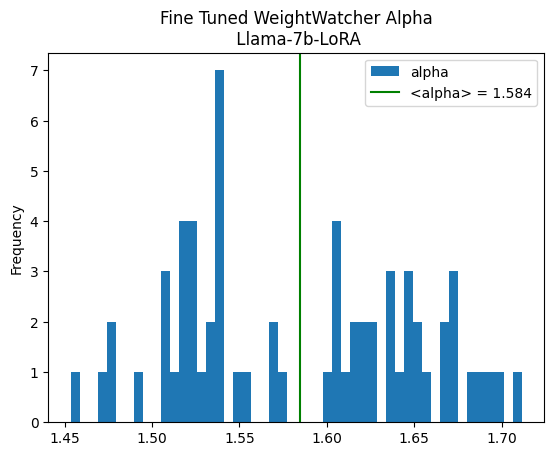

In [12]:
import matplotlib.pyplot as plt

avg_alpha = details.alpha.mean()

title=f"Fine Tuned WeightWatcher Alpha\n Llama-7b-LoRA"
details.alpha.plot.hist(bins=50)
plt.title(title)
plt.axvline(x=avg_alpha, color='green',label=f"<alpha> = {avg_alpha:0.3f}")
plt.legend()

### 4) LoRA alphas vs Base Model alpha

#### To do this step, we need the base model

In [ ]:
!git clone https://huggingface.co/DevaMalla/llama7b


Cloning into 'llama7b'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), 480.10 KiB | 5.85 MiB/s, done.


In [ ]:
watcher = ww.WeightWatcher()
base_details = watcher.analyze(model='llama_7b')

In [13]:
B = base_details
filtered_B = B[B['name'].str.contains('q|v', na=False)]
base_alphas = filtered_B.alpha.to_numpy()
lora_alphas  = details.alpha.to_numpy()

plt.scatter(x=base_alphas, y=lora_alphas)
plt.title("Llama-7b: LoRA alphas vs Base Model alphas")
plt.xlabel("Base Model Layer alpha")
plt.xlabel("Lora Layer alpha")

NameError: name 'base_details' is not defined